# Collaborative Recommander

With the collaborative-based filtering we will (based on one movie choice) recommends movies by finding similarities between the ratings from others that has rated the movie

In [1]:
import modules.recommmender.CollaborativeRecommender as cr
from sklearn.neighbors import NearestNeighbors

#### Getting data
We are going to use data about movies and rating. We load our datasets from our folder "data".

In [2]:
movie_df = cr.load_movies()
movie_df.head()

,id,title
0,862.0,Toy Story
1,8844.0,Jumanji
2,15602.0,Grumpier Old Men
3,31357.0,Waiting to Exhale
4,11862.0,Father of the Bride Part II


In [3]:
movie_df.shape

(45466, 2)

In [4]:
# todo: try making a bar plot of the film rating, and other visual plots ...
rating_df = cr.load_rating()
rating_df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
rating_df.shape

(100004, 3)

#### Preparing
We will now clean and combine the two dataframes into one

In [6]:
# drops NaN values, rename id name to movieId to match rating_df id column
movie_df = cr.prepare_movie_data(movie_df)
movie_df.head()

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [7]:
movie_df.shape

(45460, 2)

In [8]:
# combine movie_df and rating_df into one dataframe
df = cr.merge_movie_and_rating(rating_df, movie_df)
df.head()

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


In [9]:
df.shape

(44994, 4)

In [10]:
movie_rating_count = cr.count_ratings(df)
movie_rating_count.head()

,title,totalRatingCount
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2


In [11]:
movie_rating_count.shape

(2794, 2)

In [12]:
rating_with_total_rating_count = df.merge(movie_rating_count, left_on='title', right_on='title', how='left')
rating_with_total_rating_count

,userId,movieId,rating,title,totalRatingCount
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47
...,...,...,...,...,...
44989,652,129009,4.0,Love Is a Ball,1
44990,653,2103,3.0,Solaris,305
44991,659,167,4.0,K-PAX,1
44992,659,563,3.0,Starship Troopers,1


In [13]:
rating_with_total_rating_count.shape

(44994, 5)

In [14]:
rating_popular_movie = cr.get_popular_movies(rating_with_total_rating_count)
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
182,1,2294,2.0,Jay and Silent Bob Strike Back,53
183,5,2294,4.0,Jay and Silent Bob Strike Back,53
184,9,2294,2.0,Jay and Silent Bob Strike Back,53
185,15,2294,2.0,Jay and Silent Bob Strike Back,53
186,48,2294,3.0,Jay and Silent Bob Strike Back,53


In [15]:
rating_popular_movie.shape

(23969, 5)

In [16]:
# todo: try making a bar plot of the film rating, and other visual plots ...
df = cr.prepare_data()
movie_features_df = cr.create_rating_metrix(df)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
48 Hrs.,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,3.0,0.0
5 Card Stud,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,...,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
A Brief History of Time,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.5,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [17]:
movie_features_df.shape

(245, 665)

#### Modeling

In [18]:
# choose movie and size of recommendation
movie_index = 1
recommends_size = 5

In [19]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_features_df)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[movie_index, :].values.reshape(1, -1),n_neighbors=recommends_size+1)

In [20]:
distances

array([[0.        , 0.5386513 , 0.54027957, 0.5432961 , 0.57435095,
        0.57523125]], dtype=float32)

In [21]:
indices

array([[  1,  96,  59,  16, 208, 184]], dtype=int64)

#### Clustering

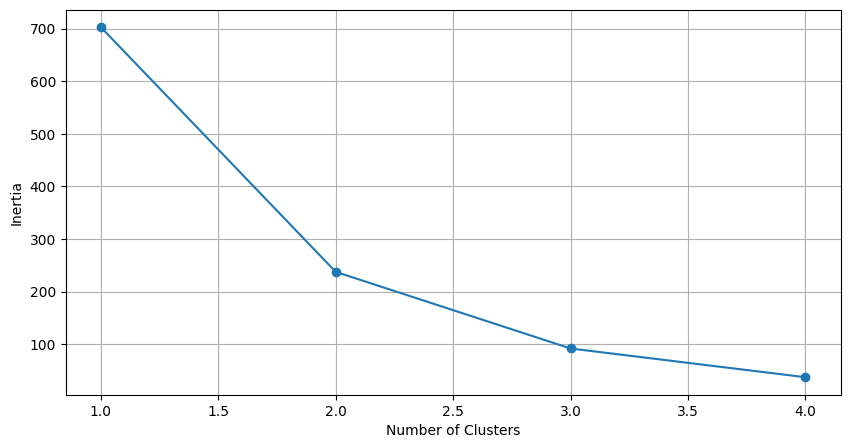

In [22]:
cr.optimise_k_means(movie_features_df, 5)

In [23]:
movie_cluster_df = cr.make_cluster(movie_features_df)
movie_cluster_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,labels
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2001: A Space Odyssey,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48 Hrs.,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,3.0,0.0,3
5 Card Stud,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4
A Brief History of Time,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.5,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2


#### Result

In [24]:
cr.recommend_movies(movie_index, recommends_size)

['Lolita',
 'Donnie Darko',
 'Arlington Road',
 'The Passion of Joan of Arc',
 'The Dark']

In [25]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} , cluster {1}:\n'.format(movie_features_df.index[movie_index], movie_features_df['labels'][[indices.flatten()[i]]].values[0]))
    else:
        print('{0}: {1}, with distance of {2}: cluster {3}'.
        format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i],movie_features_df['labels'][[indices.flatten()[i]]].values[0]))

Recommendations for 2001: A Space Odyssey , cluster 1:

1: Lolita, with distance of 0.5386512875556946: cluster 1
2: Donnie Darko, with distance of 0.5402795672416687: cluster 1
3: Arlington Road, with distance of 0.5432960987091064: cluster 2
4: The Passion of Joan of Arc, with distance of 0.5743509531021118: cluster 1
5: The Dark, with distance of 0.5752312541007996: cluster 1
